
## OBJECTIVES

- Explore two well-known unsupervised ML methods
- Work with a text-rich data set 
- Apply Naive Bayes with varying feature selection decisions
- Convert ML code from one language to another
- Find a real data set to apply a known ML method to
- Recognize methodological limitations and potential ethical concerns when using data from the real-world


## Section 1: Code Conversion 




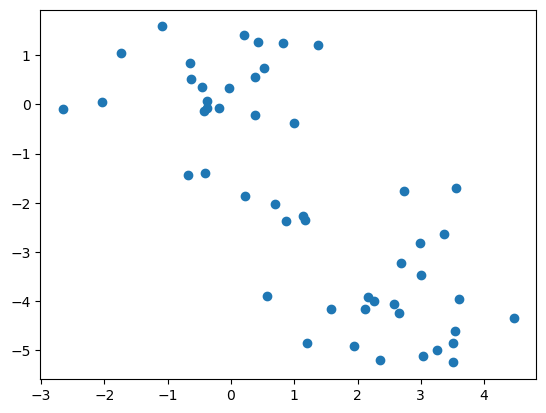

In [2]:
#Part1 : K means clustering and hierarchical clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(2)
x=np.random.normal(size=(50,2))
x[:25, 0]=x[:25, 0]+3
x[:25, 1]=x[:25, 1]-4


#to plot the points
x=pd.DataFrame(x)
plt.scatter(x.iloc[:,0],x.iloc[:,1])
plt.show()

In [3]:
# perform K means
from sklearn.cluster import KMeans

x=np.array(x)
km=KMeans(n_clusters=3, n_init=20, random_state=0).fit(x)
cluster_label=km.labels_
print(cluster_label)

[0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 2 1 1 2 1 1 1 1 1 1 2]


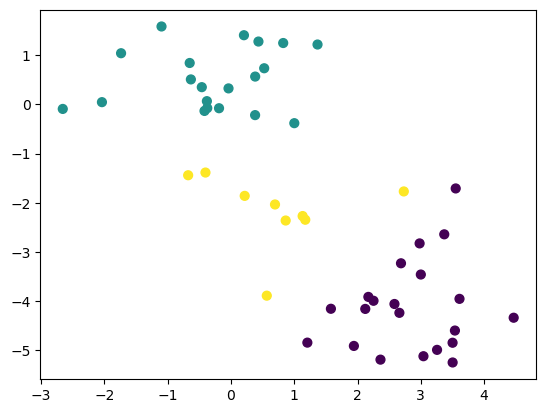

In [4]:
df=pd.DataFrame(x)
df['cluster']=pd.Series(km.labels_, index=df.index).astype('category')
plt.scatter(x[:,0],x[:,1],c=km.labels_+1,s=40,cmap='viridis')
plt.xlabel('')
plt.ylabel('')
plt.show()

69.30698623331516


C:\Users\minal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


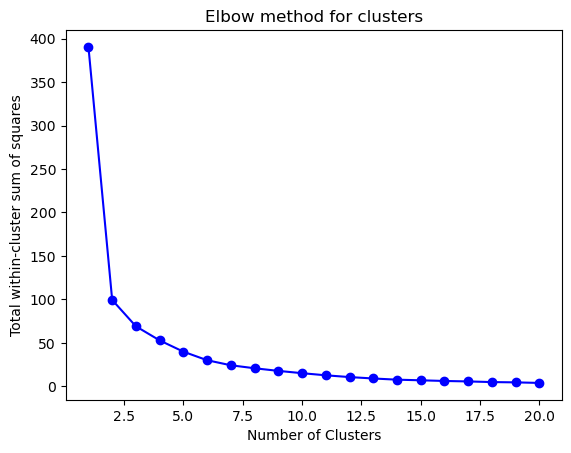

In [5]:
#ELBOW PLOT

km_out=KMeans(n_clusters=3,n_init=1,random_state=3).fit(x)
tot_withinss=km_out.inertia_

print(tot_withinss)

point = np.empty((0,0))
for k in range(1,21):
    km_out=KMeans(n_clusters=k,n_init=20,random_state=1).fit(x)
    point=np.append(point,km_out.inertia_)
    
plt.plot(range(1,21),point,'bo-') 
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')
plt.title('Elbow method for clusters')
plt.show()

In [6]:
#HIERARCHICAL CLUSTERING
import scipy.cluster.hierarchy as clhr
from scipy.cluster.hierarchy import dendrogram,linkage, cut_tree


hc_complete=linkage(x, method='complete')
hc_average=linkage(x, method='average')
hc_single=linkage(x, method='single')

kmeans=KMeans(n_clusters=3,n_init=20,random_state=2)
km_out=kmeans.fit(x)
d=km_out.labels_

a=cut_tree(hc_complete,n_clusters=[3]).flatten()
b=cut_tree(hc_average,n_clusters=[3]).flatten()
c=cut_tree(hc_single,n_clusters=[3]).flatten()


print('Complete linkage\n',a)
print('\nAverage linkage\n',b)
print('\nSingle Linkage\n',c)
print('\nKmeans\n',d)
print('\nComparison')
print('Complete and Kmeans:',np.array_equal(a, d))
print('Average and Kmeans:',np.array_equal(b, d))
print('Single and Kmeans:',np.array_equal(c, d))

Complete linkage
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 2 1 2 1 2 2 2 1 1 2 2
 2 2 1 2 1 1 1 2 1 1 2 1 1]

Average linkage
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 2 2 2 1 2 2 2 1 2 2 2
 2 2 1 2 2 1 2 2 2 2 2 2 1]

Single Linkage
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 2 2 2 1 2 2 2 1 2 2 2
 2 2 1 2 2 1 2 2 2 2 2 2 1]

Kmeans
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 2 1 1 2 1 1 1 1 1 1 2]

Comparison
Complete and Kmeans: False
Average and Kmeans: False
Single and Kmeans: False


### Part 2

Number of records: 569

Number of features/columns: 30
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst

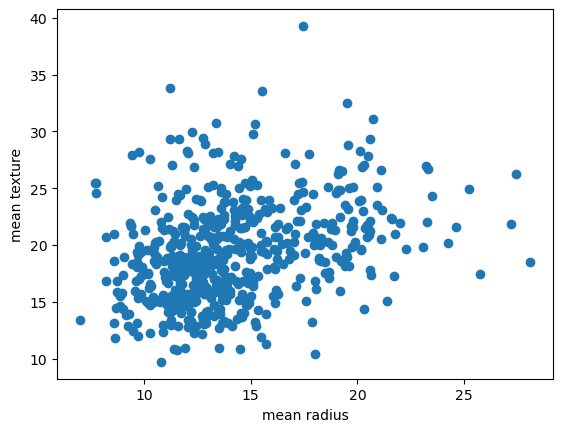

[1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 2 0 0 0 0 2 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 2 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 1 1 0 1 2 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 2 0 2 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 2 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 2 0 0 0 0 1 0 0 1 0 2 1 0 0 0 0 1 2 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 2 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 2 0 0 0 0 0 0 2 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 2 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 2
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 

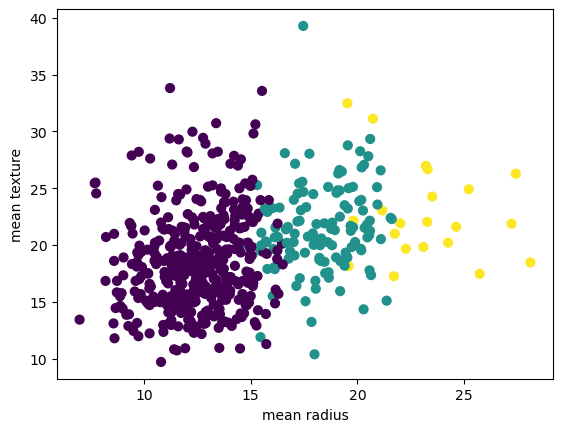

50517820.65174766


C:\Users\minal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


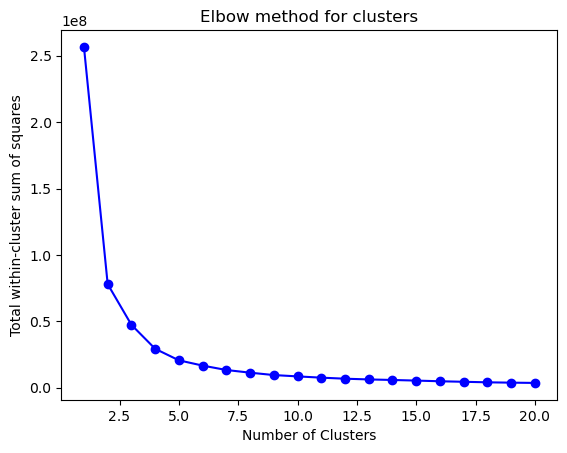

Complete linkage
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

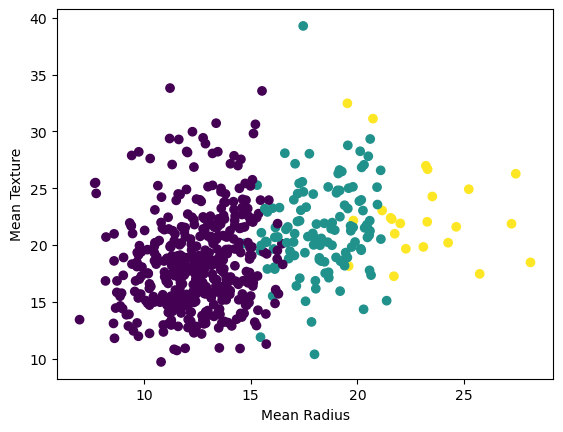

In [7]:
#PART 2
from sklearn.datasets import load_breast_cancer


data=load_breast_cancer()

print("Number of records:",data.data.shape[0])
print("\nNumber of features/columns:",data.data.shape[1])
x=pd.DataFrame(data.data,columns=data.feature_names)
print(x.head(5))

#plot points
plt.scatter(x.iloc[:,0],x.iloc[:,1])
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

#show cluster labels
km=KMeans(n_clusters=3,n_init=20,random_state=0).fit(x)
cluster_label=km.labels_
print(cluster_label)

df=pd.DataFrame(x)
df['cluster']=pd.Series(km.labels_, index=df.index).astype('category')
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=km.labels_+1,s=40,cmap='viridis')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

km_out=KMeans(n_clusters=3,n_init=1,random_state=3).fit(x)
tot_withinss=km_out.inertia_

print(tot_withinss)

point = np.empty((0,0))
for k in range(1,21):
    km_out=KMeans(n_clusters=k,n_init=20,random_state=1).fit(x)
    point=np.append(point,km_out.inertia_)
    
plt.plot(range(1,21),point,'bo-') 
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')
plt.title('Elbow method for clusters')
plt.show()

hc_complete=linkage(x, method='complete')
hc_average=linkage(x, method='average')
hc_single=linkage(x, method='single')

kmeans=KMeans(n_clusters=3,n_init=20,random_state=2)
km_out=kmeans.fit(x)
d=km_out.labels_

a=cut_tree(hc_complete,n_clusters=[3]).flatten()
b=cut_tree(hc_average,n_clusters=[3]).flatten()
c=cut_tree(hc_single,n_clusters=[3]).flatten()


print('Complete linkage\n',a)
print('\nAverage linkage\n',b)
print('\nSingle Linkage\n',c)
print('\nKmeans\n',d)
print('\nComparison')
print('Complete and Kmeans:',np.array_equal(a, d))
print('Average and Kmeans:',np.array_equal(b, d))
print('Single and Kmeans:',np.array_equal(c, d))




Breast cancer is a classic dataset in python available in scikit-learn. It contains data about breast cancer tumors from 569 patients with 30 features and tells whether tumor is malignant or benign

Hypothesis drawn from clustering is that there are 3 distinct clusters present in dataset based on the mean radius and mean texture of the tumor.For mean radius of tumor from 0-16 belong to cluster1, some tumors with radius from 15-17 can lie in cluster 1/2 while remaining from 16-20 belong to cluster2,  21-25 belong to one cluster

##  Limitations with the two methods

Kmeans is sensitive to outliers whereas Hierarchical clustering can handle outliers well. KMeans requires number of clusters to be specified in advance, which is not the case with hierarchical clustering. Different initialization can result in different clusters for both.K means may not work well with non linear data, Hierarchical clustering can have difficulty handling non-flat clusters, such as clusters that have subclusters within them.

## Section 2: Decision Trees (15 pts)



- You will see an error code when loading the first data set. Address task 1 and think about why this error was given. 

- Run the code provided and make sure it works. 
- Answer the question listed below about key features? 
- Visualize your decision tree. 
- Improve upon your model. 




#### Task 1

Try loading the Boston data set below. This is a well-known data set that has been used for years in ML classes. You will see an error when trying to load it. Reflect on this error and do a little research on the web why this data set has been removed from sklearn. 

One article about the problem: https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8

 a) Explain the problem (beyond what is given in the error code) and why the data set was removed. b) Reflect on the history at the time, the and how these biases may show up in modern data sets as well. c) Suggest one way that this could have been avoided.

In [7]:
# Load the Boston data and pause to think about the problems with this common used data set

from sklearn.datasets import load_boston

'''DEPRECATED: load_boston is deprecated in 1.0 and will be removed in 1.2.

The Boston housing prices dataset has an ethical problem. You can refer to the documentation of this function for further details.

The scikit-learn maintainers therefore strongly discourage the use of this dataset unless the purpose of the code is to study and educate about ethical issues in data science and machine learning.
'''
# Load the Boston dataset
boston_dataset = load_boston()

'DEPRECATED: load_boston is deprecated in 1.0 and will be removed in 1.2.\n\nThe Boston housing prices dataset has an ethical problem. You can refer to the documentation of this function for further details.\n\nThe scikit-learn maintainers therefore strongly discourage the use of this dataset unless the purpose of the code is to study and educate about ethical issues in data science and machine learning.\n'

### Issues with Boston dataset

a)As mentioned above there is an ethical problem associated with the dataset, the data collected reflects the racial discrimination at that time, i.e. the house prices affected by neighborhood race.

b)In the past there were many societal biases and prejudices which were reflected in the data collection. This can be introduced in modern datasets as well through missing data- certain groups being excluded from data collection, encoding bias- some categories of race were incorrectly recorded in old datasets, sampling bias- data collected only from certain group of people.

c)Simply by ensuring diverse representation(backgrounds,individuals, demographics etc) in the data collection process and prioritizing inclusivity and diversity.Auditing the data can also help reduce the bias in the datasets

#### Apply decision trees to a different data set

We will use a subset of the diabetes data set provided by the UCI machine learning repository. The data set is available on canvas. Additional details about the data set can be found here:

https://archive.ics.uci.edu/ml/datasets/diabetes

Medical data can also be sensitive, with consequential outcomes for patients and research. Especially if there are inequities in the medical systems, access to healthcare, way of collecting data, and generalizing data from one population to another. These are important things to keep in mind when dealing with any dataset.



In [175]:
# Load the data set
df=pd.read_csv("diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [176]:
# Select features
# Ideally we would select features in consultation with a domain expert. Since that is not always possible, there are methods for identifying the most relevant featuers. As a start, we will select all but the outcome variable.


x = df.drop(['Outcome'], axis=1)
y = df.Outcome

(2 pts) What features or feature do you think will be most predictive? What feature do you think will be at the root of your tree? 

Think about this before running your code. Then, come back to this question after running your code below and answer the questions. 


According to me the features that will be most predictive in case of the diabetes dataset will be Age,BMI,Insulin and Glucose.
The feature that I am guessing to be the root of the tree will be Insulin or glucose

post running the decision tree:
 Glucose is the root of the tree which means it is the most important feature

In [177]:
# Load libraries for applying decision trees

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree

from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt


In [178]:
# Set up your training and test variables

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
model = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [179]:
# We need to evaluate our results. There are various metrics that can be used for this. 

print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

Accuracy: 72.72727272727273


array([[81, 18],
       [24, 31]], dtype=int64)

#### Visualizing Decision Trees

One of the advantages of decision trees is that they are easier to interpret, especially when you can visualize them.

(3 pts) For your first coding task, find a way to visualize the decision tree that you created above. There are many different ways to do this. Explore the help files in sklearn or utilize resources on the web. 

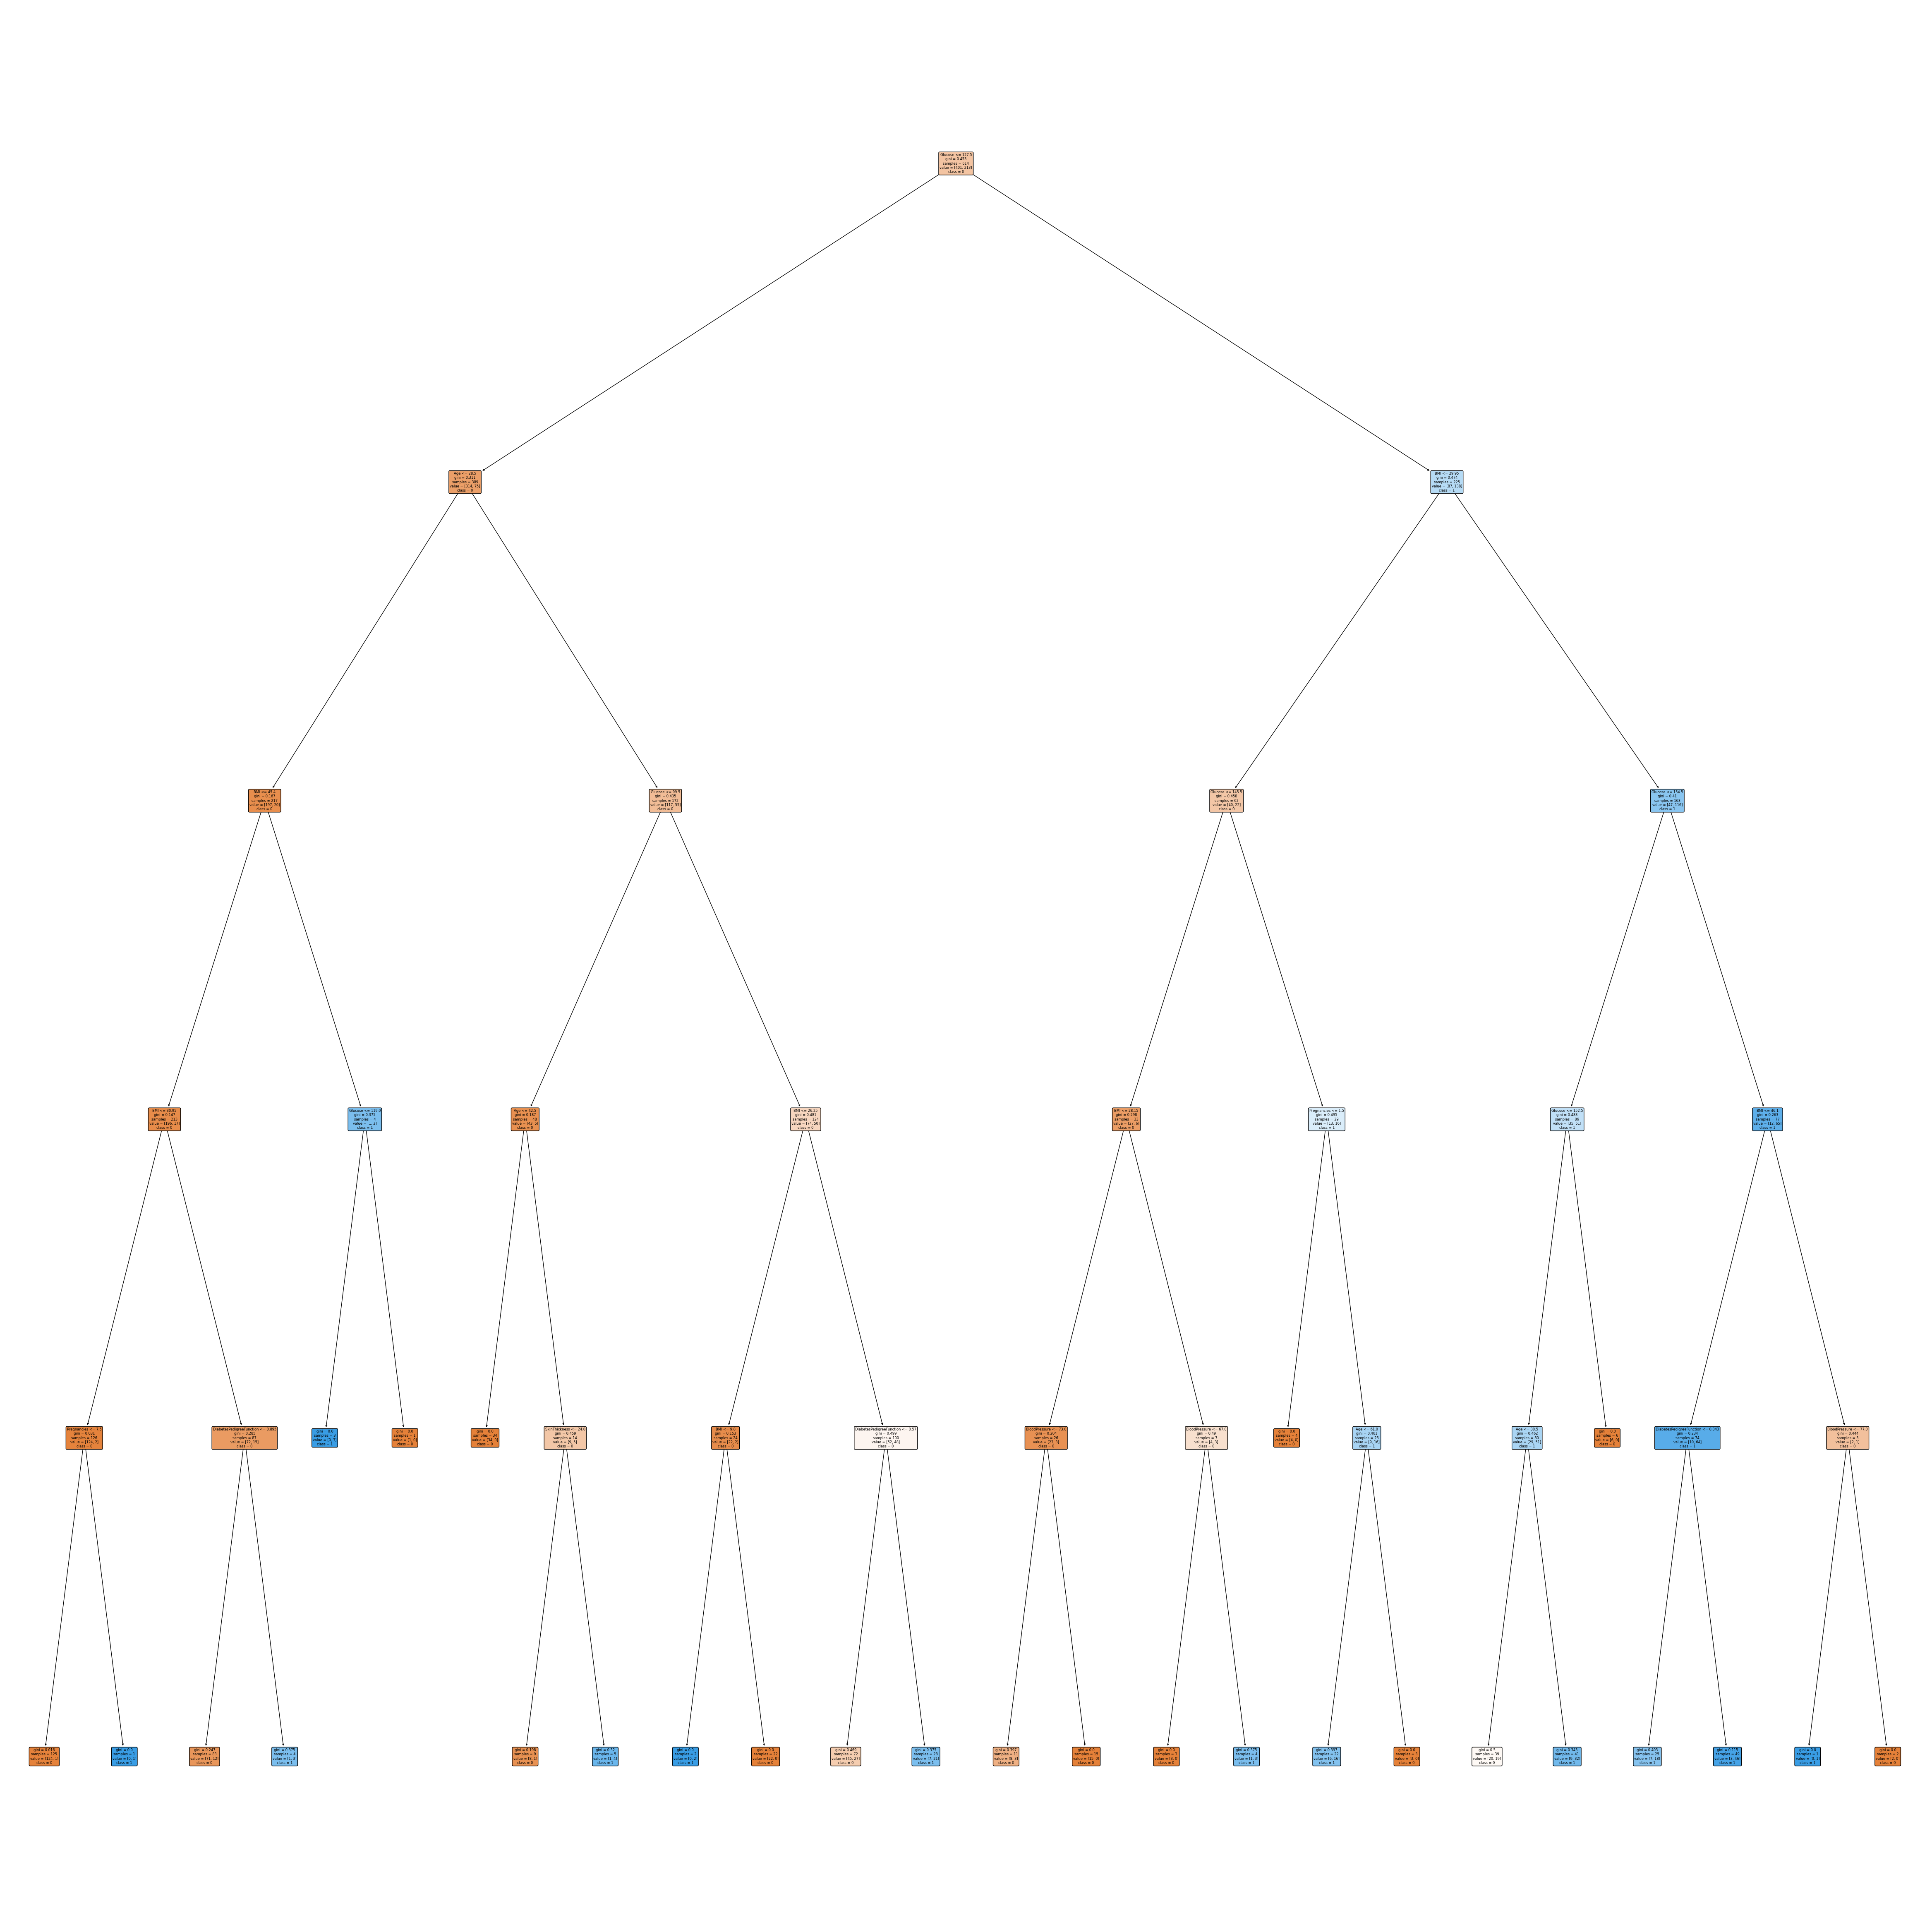

In [181]:
# Put your answer here

from sklearn.tree import plot_tree
fig=plt.figure(figsize=(60,60))
plot_tree(model, filled=True, feature_names=x.columns.values,class_names=['0','1'],rounded=True,fontsize=6)
plt.show()
fig.savefig("decision_tree.png", dpi=300)

#### Improve upon your model

There are many ways to improve your model. For example, you could vary the maximum depth of your true, you could select a subset of the features, you could try out Random Forests or AdaBoost, etc. Try at least three different strategies and then compare your evaluation metrics to the original evaluation metrics above to each of the new things that you try.  

In [182]:
#Strategy 1 : Pruning

pruned_tree=DecisionTreeClassifier(max_depth=3)

#training the pruned decision tree
pruned_tree = pruned_tree.fit(x_train, y_train)

#evaluating the classifier
y_pred=pruned_tree.predict(x_test)
print("Pruned Decision Tree Results:")
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

Pruned Decision Tree Results:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154

Accuracy: 78.57142857142857


array([[85, 14],
       [19, 36]], dtype=int64)

In [21]:
#Strategy 2 : Varying max_depth of tree

for max_depth in range(1,5):
    improv_model=DecisionTreeClassifier(max_depth=max_depth)
    improv_model.fit(x_train,y_train)
    y_pred=improv_model.predict(x_test)

print("Max depth: ", max_depth)
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

Max depth:  4
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.70      0.56      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154

Accuracy: 75.97402597402598


array([[86, 13],
       [24, 31]], dtype=int64)

In [22]:
#Strategy 3: Using AdaBoost
from sklearn.ensemble import AdaBoostClassifier

base_model=DecisionTreeClassifier(max_depth=5,random_state=1)
improv_model_ab=AdaBoostClassifier(base_estimator=base_model,n_estimators=100,random_state=2)
improv_model_ab.fit(x_train,y_train)

y_pred=improv_model_ab.predict(x_test)

print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)


              precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154

Accuracy: 77.27272727272727


array([[84, 15],
       [20, 35]], dtype=int64)

## Section 3: Fake News and Naive Bayes (20 pts)

For this section, you are going to apply Naive Bayes to a data set used in a recent [Kaggle competition](https://www.kaggle.com/competitions/fake-news/data). The goal of the competition is to build a classifer that could predict whether a news story is fake or true. 

I have provided the data sets on canvas. It includes three files: (1) a training data file with labels that includes an id, author, title, and text, (2) the test data set with the same features as the training data file except with no label, and a (3) sample file of your submission. 

You will receive points for the following tasks completed:

- Reading in the training data (2 pts)

- Extracting a set of features to include in your NB classifer. Justify your features in 2-3 sentences. (3 pts)

- Running the NB classifier (4 pts)

- Reporting your accuracy on the training data using cross validation (1 pt)

- Running your classifer on the test data set (2 pts).

- Answer the following question in 2-3 paragraphs (3 pts): how could you improve your accuracy? 

- Bonus point (1 pt): Implement one of your strategies above.

- Answering Discussion Questions (5 pts)




In [124]:
# (2 pts) Read in your training data
train_data=pd.read_csv('train.csv')
print(train_data.shape)
train_data.head(5)

(20800, 5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [167]:
# (3 pts) Extract features

import re
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer

#print(train_data[train_data['title'].isna()])
train_data=train_data.fillna('')


#preprocessing text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    words = nltk.word_tokenize(text.lower())    # Tokenize text into words
    stop_words = set(nltk.corpus.stopwords.words('english'))  # Remove stop words
    words = [w for w in words if not w in stop_words]
    words = [w.translate(str.maketrans("", "", string.punctuation)) for w in words]  # Remove punctuation
    
    lemmatizer = nltk.stem.WordNetLemmatizer()      # Lemmatize words
    words = [lemmatizer.lemmatize(w) for w in words]
    text = " ".join(words)
    
    return text

# Apply the preprocessing function to the text and title column 
train_data['content']=train_data['title']+' '+train_data['text']
train_data['content'] = train_data['content'].apply(preprocess_text)

#TF-IDF Vectorizer
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(train_data['content'])
y=train_data['label']

#splitting data into train and test
X_train, X_test,y_train,y_test=train_test_split(X_train,y,test_size=0.2,random_state=10)



I chose text and title and title is usually a good summary off the content and text contains the main body of the content , used together they can provide a comprehensive representation of the content and influence the accuracy of model.

In [168]:
#Naive Bayes-Multinomial NB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score


mnb=MultinomialNB()
scores=cross_val_score(mnb, X_train, y_train, cv=10, scoring='accuracy')
print("Cross validation scores:",scores)
print("Cross validation: Mean accuracy score:",scores.mean()*100)


mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)




Cross validation scores: [0.85276442 0.84014423 0.83293269 0.84735577 0.84435096 0.82391827
 0.83533654 0.85456731 0.85697115 0.85096154]
Cross validation: Mean accuracy score: 84.39302884615385


In [160]:
# (1 pt) Report Accuracy

print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2090
           1       0.99      0.69      0.82      2070

    accuracy                           0.84      4160
   macro avg       0.88      0.84      0.84      4160
weighted avg       0.88      0.84      0.84      4160

Accuracy: 84.44711538461539


array([[2078,   12],
       [ 635, 1435]], dtype=int64)

In [169]:
# (2 pts) Run the classifer on the test data.

test_data=pd.read_csv('test.csv')
#print(test_data[test_data['title'].isna()]) 
test_data=test_data.fillna('')
#print(test_clean.isna().sum()) 


test_data['content']=test_data['title']+' '+test_data['text']
test_data['content'] = test_data['content'].apply(preprocess_text)

X_test_vectorized=vectorizer.transform(test_data['content'])

y_test_pred=mnb.predict(X_test_vectorized)



submit_data=pd.read_csv('submit.csv')
predicted_labels=submit_data.set_index('id').loc[test_clean['id']]['label'].values

print(classification_report(predicted_labels,y_test_pred))
print("Accuracy:",metrics.accuracy_score(predicted_labels, y_test_pred)*100)
confusion_matrix(predicted_labels, y_test_pred)

              precision    recall  f1-score   support

           0       0.52      0.76      0.62      2339
           1       0.69      0.43      0.53      2861

    accuracy                           0.58      5200
   macro avg       0.60      0.59      0.57      5200
weighted avg       0.61      0.58      0.57      5200

Accuracy: 57.80769230769231


array([[1784,  555],
       [1639, 1222]], dtype=int64)

In [ ]:
# (3 pts) Answer the following question in 2-3 paragraphs (3 pts): how could you improve your accuracy?

1)To improve accuracy of naive bayes we can use boosting and bagging techniques, another way can be by choosing other features in addition to text and title.
I can even try different values of alpha hyperparameter for the Multinomial Naive Bayes or can even try GaussianNB to see whether another model gives better accuracy

In [173]:
# Bonus point (1 pt): Implement one of your strategies above.
#tried imporving the model using adaboost

from sklearn.ensemble import AdaBoostClassifier


improv_model=AdaBoostClassifier(base_estimator=mnb, n_estimators=100,random_state=10)
improv_model.fit(X_train,y_train)
y_pred=improv_model.predict(X_test)


print(classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      2090
           1       0.82      0.95      0.88      2070

    accuracy                           0.87      4160
   macro avg       0.88      0.87      0.87      4160
weighted avg       0.88      0.87      0.87      4160

Accuracy: 87.13942307692307


## Discussion Questions

1. Why is the term "fake news" insufficient and problematic as it is commonly applied to the analysis of misinformation? It may help to distinguish between misinformation, disinformation, and propaganda. It may also be useful to trace back how "fake news" has been used politically in the US. (2pts)

Ans: Fake news can include wide variety of content like propaganda(to influence people's beleifs and attitudes), misinformation(false and misleading information that is spread unintentionally)and false or misleading information that is spread intentionally and this can have different meaning and implications. Fake news is driven by variety of factors like algorithmic bias, ideological differences etc.
Fake news has been used politically in the US so as to undermine people's trust in media and reduce the importance of news outlets and journalists hence leading to mistrust, confusion and difficulty in finding reliable and credible sources of information.
Hence the term fake news is insufficient and problematic and it is important to distinguish between different types of misinformation catgeories to be more precise


2. Why is it difficult to classify misinformation? What makes something misinformation in the first place? How do people get around being flagged as misinfo? Is it always as binary as "true" or "false"? (2pts)

Ans: Classification of misinformation is difficult due to the various forms of misinformation that exist- conspiracy theories, fake news, hoaxes, propaganda, pure satirical purpose etc. Hence it is difficult to differentiate due to  manipulated lies, truths, partial truths and point of views etc.
Misinformation is spread of information(that holds no absolute to partial truths)spread by individuals with certain motives, biases or for fun.People get around being flagged as minsinfo through various ways like discrediting sources, appealing to emotion, misleading headlines or images, manipulation through social media etc.
Misinformation classification is not as simple as binary "true" or "false". Subjective interpretations, contexts, the level of truth behind it all contribute to misinformation classification and its accuracy.They can even be classified as exaggerated or misleading rather than false. There can also be degrees of misinformation where some parts are true and some are not hence it cannot always be true or false.


3. Beyond using ML, what domain expertise and stakeholder analysis would be useful for identifying and combatting misinformation? (1pt)
Some of the domain expertise useful in identifying misinformation can be subject matter experts, information professional, media professionals. Stakeholders like government agenices, NGOs, industry groups, general public can also help develop strategies for combatting misinformation.In addition to this knowledge of the respective fields through historical study can also help to identify the trends and behavior behind the misinformation.